<a href="https://colab.research.google.com/github/zurriyatafatni/goldprice_forecasting/blob/main/GOLD_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import numpy as np



In [ ]:

#baca data pada file data.csv dalam folder Data menggunakan pandas
data = pd.read_csv('gold_price2.csv')
data.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,10/22/2001,275.500000,275.500000,275.500000,275.500000,275.500000,4
1,10/23/2001,277.000000,277.000000,276.100006,276.100006,276.100006,42
2,10/24/2001,275.899994,275.899994,275.899994,275.899994,275.899994,1
3,10/25/2001,277.799988,277.799988,277.799988,277.799988,277.799988,1
4,10/26/2001,277.899994,277.899994,277.899994,277.899994,277.899994,1


In [ ]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
4765,10/15/2020,1897.300049,1906.300049,1889.599976,1903.199951,1903.199951,254
4766,10/16/2020,1898.500000,1900.800049,1898.500000,1900.800049,1900.800049,53
4767,10/19/2020,1907.300049,1907.800049,1899.500000,1906.400024,1906.400024,43
4768,10/20/2020,1901.300049,1910.400024,1896.099976,1910.400024,1910.400024,329
4769,10/21/2020,1913.599976,1927.300049,1913.599976,1924.599976,1924.599976,329


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4770 non-null   object 
 1   Open       4770 non-null   float64
 2   High       4770 non-null   float64
 3   Low        4770 non-null   float64
 4   Close      4770 non-null   float64
 5   Adj Close  4770 non-null   float64
 6   Volume     4770 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.0+ KB


In [ ]:
data= pd.DataFrame(data) 
  
# Remove two columns name is 'C' and 'D' 
data = data.drop(['Open', 'Low','Close','Adj Close','Volume'], axis = 1) 

In [ ]:
data = pd.DataFrame(data)
data

,Date,High
0,10/22/2001,275.500000
1,10/23/2001,277.000000
2,10/24/2001,275.899994
3,10/25/2001,277.799988
4,10/26/2001,277.899994
...,...,...
4765,10/15/2020,1906.300049
4766,10/16/2020,1900.800049
4767,10/19/2020,1907.800049
4768,10/20/2020,1910.400024


In [ ]:
data.shape

(4770, 2)

In [ ]:
import datetime
data.Date = data.Date.apply(lambda x:datetime.datetime.strptime(x, "%m/%d/%Y"))
data['Date']=data['Date'].map(datetime.datetime.toordinal)
# strdates = data.append(str(datetime.date()))
data.info()
# data.to_csv('data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4770 non-null   int64  
 1   High    4770 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 74.7 KB


# Simple Linear Regression

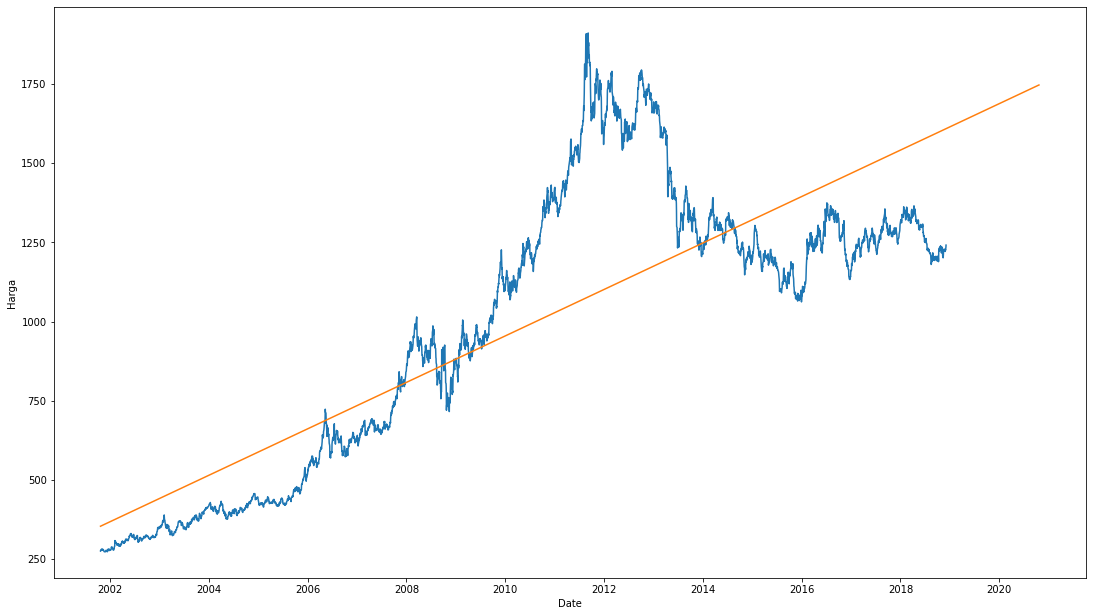

In [ ]:
#reshape data x dan y dari bentuk
x = data.Date.values.reshape(-1,1)
xx = data['Date'].map(datetime.datetime.fromordinal)

y = data.High.values.reshape(-1,1)

#perbandingan data train dan testing 90%:10%

#ambil nilai x dari urutan pertama hingga 500 terakhir 
x_train = x[:-500]
#ambil nilai y dari urutan pertama hingga 500 terakhir 
y_train = y[:-500]


#ambil 954 data terakhir dari x
x_test = x[-500:]
#ambil 954 data terakhir dari y
y_test = y[-500:]

smpReg = linear_model.LinearRegression()


#train model
smpReg.fit(x_train, y_train)

#test model
predict = smpReg.predict(x_test)

#menghitung RMSE model
RMSE = np.sqrt(np.mean(pow(predict - y_test, 2)))

#plot data dan model
figure = plt.figure(1)
figure.set_size_inches(18.5, 10.5)
plt.plot(x_train, y_train)
plt.plot(xx, smpReg.predict(x))
plt.xlabel('Date')
plt.ylabel('Harga')
plt.show()
 

In [ ]:
prediksi = pd.DataFrame(predict)

In [ ]:
prediksi.rename(columns={"index":"ID", 0:"Harga"})
# submission = submission.iloc[:214201,:]

,Harga
0,1609.655100
1,1609.855993
2,1610.458673
3,1610.659566
4,1610.860459
...,...
495,1746.061594
496,1746.262487
497,1746.865167
498,1747.066060


In [ ]:
print(RMSE)

219.01414911969883
